In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [2]:

#binario
X = np.array([0,0,0,1,1,0,1,1]).reshape(4,2)

#bipolar
Xbip = np.array([-1,-1,-1,1,1,-1,1,1]).reshape(4,2)

#taxa de aprendizagem
r_arr = np.array([0.05,0.25,0.5,1.,2.])

#termo de momento
alphas = np.array([0.0,0.5,1.])

#y
y = np.array([0,1,1,0]).reshape(4,)

#y bipolar
ybip = np.array([-1,1,1,-1]).reshape(4,)

In [19]:
print(y)

[0 1 1 0]


In [13]:
print(X)
print(Xbip)
print(r_arr, "taxas de aprendizagem")
print(alphas, "termos de momento")

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]]
[0.05 0.25 0.5  1.   2.  ] taxas de aprendizagem
[0.  0.5 1. ] termos de momento


In [ ]:
#descida de gradiente sgd

model = MLPClassifier(
    activation='relu', solver='sgd', learning_rate_init=r_arr, momentum=alphas, max_iter=10000, hidden_layer_sizes=(4,), shuffle=True)
model.fit(X, ys)

In [9]:
def run_model(X,y,activation_fun,r,alpha, max_iters, do_shuffle):
    
    min_loss = 10
    while min_loss > .1:
        
        model = MLPClassifier(
        activation= activation_fun, solver='sgd', learning_rate_init=r, tol=1e-4, momentum=alpha, hidden_layer_sizes=(8,), max_iter=max_iters, shuffle=do_shuffle)
    
        model.fit(X,y)
        min_loss = np.array(model.loss_curve_).min()
    
    #confusion matrix
    
    print('Score: ', model.score(X, y))
    print('number of iterations until convergence: ', model.n_iter_)
    #print('Loss: ', lastLoss)
    
       #loss curves
    loss_curves = model.loss_curve_
    plt.plot(loss_curves)
    plt.show()
        
    
    

Score:  1.0
number of iterations until convergence:  1927


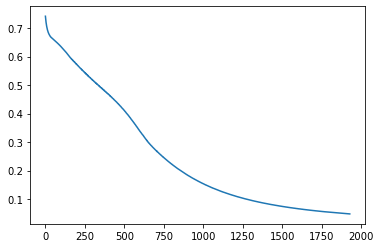

In [10]:
run_model(X=X,y=y,activation_fun='relu',r=0.05,alpha=0,max_iters=1000000, do_shuffle=True)